In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('import85.csv')

In [3]:
df.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,hoursepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
 fuel_system          object
bore                 float64
stroke               float64
compression_ratio    float64
hoursepower          float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [5]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
 fuel_system          0
bore                  4
stroke                4
compression_ratio     0
hoursepower           2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [6]:
df.shape

(205, 26)

In [7]:
# summary statistics for normalized losses, intention is to replace missing entries
df.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

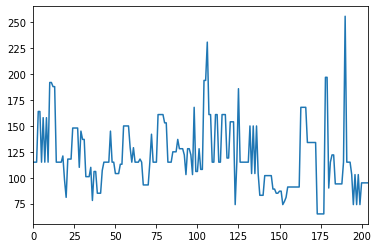

In [13]:
%matplotlib inline
df.normalized_losses.plot()

In [15]:
import numpy as np
# replacing with median value
df.normalized_losses.replace(np.NaN, df.normalized_losses.median(), inplace = True)
df.normalized_losses.describe()

count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized_losses, dtype: float64

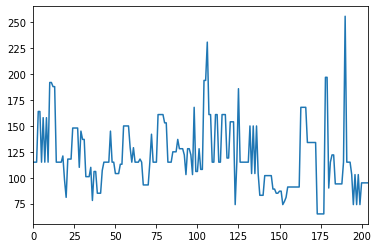

In [16]:
df.normalized_losses.plot() # the shape of the distribution and the summary statistics are quite similar

In [17]:
# dropping missing values from df
df.dropna(axis = 0, inplace = True)

In [18]:
df.shape

(193, 26)

In [25]:
# one-hot encoding fuel_type
fuel_dummies= pd.get_dummies(df.fuel_type)

In [26]:
fuel_dummies.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


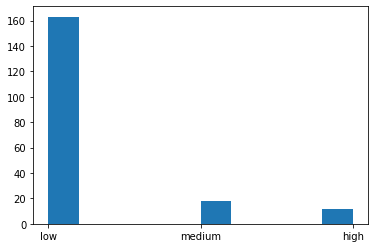

In [30]:
# binning price into 3 "bins"
bins = np.linspace(min(df.price), max(df.price), 4)
group_names = ["low", "medium", "high"]
df["price_binned"] = pd.cut(df.price, bins, labels = group_names, include_lowest = True)
import matplotlib.pyplot as plt
plt.hist(df.price_binned)
plt.show()

In [33]:
df.to_csv(r"C:\Users\andra\Desktop\jup_not\import85p.csv")